In [1]:
 # General Import

import pandas as pd
import numpy as np
import re
import seaborn as sns

import requests
import io
import datetime
import os


from textblob import TextBlob
import re

from wordcloud import WordCloud

import matplotlib as plt
import matplotlib.pyplot

import zipfile

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

### Importando uma amostra aleatória de 10000 linhas (dado bruto muito extenso)
##### aleatoridade fixa

In [3]:
df = pd.read_csv("imdb-reviews-pt-br.csv", encoding="utf-8")

In [4]:
df2 = df.sample(n=10000, random_state=1).reset_index(drop=True)
df2.to_csv("imdb-10k.csv", sep=",", index=False)

In [5]:
#Salvando arquivo e carregando para caber no diretório do github
df_imdb = pd.read_csv("imdb-10k.csv", sep=",", encoding="utf-8")

In [6]:
df_imdb.head()

,id,text_en,text_pt,sentiment
0,31656,Murders are occurring in a Texas desert town. ...,Assassinatos estão ocorrendo em uma cidade do ...,neg
1,25733,Pros: NothingCons: EverythingPlot summary: A f...,Prós: NothingCons: EverythingPlot resumo: Uma ...,neg
2,23066,The very first talking picture has returned fr...,A primeira imagem falada voltou do esqueciment...,pos
3,25669,"Noting the cast, I recently watched this movie...","Observando o elenco, recentemente assisti a es...",neg
4,8006,this film is basically a poor take on the old ...,Este filme é basicamente uma versão pobre da a...,neg


In [7]:
df_imdb.sentiment.value_counts()

neg    5010
pos    4990
Name: sentiment, dtype: int64

In [8]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
id           10000 non-null int64
text_en      10000 non-null object
text_pt      10000 non-null object
sentiment    10000 non-null object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


### Separando Dados de Treino e Dados de Teste

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_imdb, shuffle=False)

In [10]:
train.shape

(7500, 4)

In [11]:
test.shape

(2500, 4)

In [12]:
#Tokenizador apropriado para Twitter 

from nltk.tokenize import TweetTokenizer 

In [13]:
tweet_tokenize = TweetTokenizer()

In [14]:
train.drop_duplicates(["text_pt"], inplace=True)
train.text_pt.count()

C:\Users\bruna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


7496

In [15]:
tweets = train["text_pt"]
classes = train["sentiment"]

#### Montando uma função que limpe os tweets no dataset
##### O dataset de treino não possui estas caracteristicas, porém o dataset que iremos aplicar possui, logo é importante já ter esta função

In [16]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub("@[A-Za-z0-9]+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('\n',' ').replace('RT', ' ')
    instancia = re.sub(r"http\S+", "", instancia)
    instancia = re.sub(r'#', '', instancia)
    instancia = re.sub(r'rt', '', instancia)
    return (instancia)

Limpeza_dados('RT Olá @teste  tudo bem? #testando https//tco/qtdtebytps :) ;)  ')



' olá   tudo bem? testando     '

In [17]:
# Aplica a função em todos os dados:
tweets = [Limpeza_dados(i) for i in tweets]

In [18]:
tweets[:25]

['assassinatos estão ocorrendo em uma cidade do deseo do texas quem é responsável? ligeiras novidades de mistério e tensões raciais este último realmente não se encaixa, mas de outra forma estritamente para os fãs de slasher, que irão apreciar a nesga e nudez, que são dois elementos convencionais para estes filmesdana kimmell de sextafeira 13ª infâmia estrelas como o malcriado adolescente quasedetetive1 / 2 da mpaa pontuação r por violência e nesga, nudez e alguma linguagem',
 'prós nothingcons everythingplot resumo uma repóer fêmea corre para um caroneiro que conta suas histórias sobre as moes de pessoas que foram moas por zumbis revisão nunca na minha vida eu me deparei com um filme tão ruim quanto the zombie chronicles filmado em um orçamento do que parece ser cerca de 20 dólares, o tzc é um filme de terror completamente horrível que conta com atores esquecidos e esquecidos que não poderiam agir para salvar suas vidas, o que é mais grosseiro do que assustador como um filme como esse

### Modelling e aplicando no dado

In [19]:
vectorizer = CountVectorizer(analyzer='word', tokenizer=tweet_tokenize.tokenize)

In [20]:
#aplicação
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets) #ver qual tipo gera (matriz espaço)

scipy.sparse.csr.csr_matrix

In [21]:
model = MultinomialNB()
model.fit(freq_tweets, classes)

MultinomialNB()

In [22]:
freq_tweets.shape #linhas e colunas da matriz

(7496, 63372)

In [23]:
test.text_pt.values

array(['Dado o baixo orçamento e as limitações de produção, este filme é muito bom. É plausível, realista e mostra como os cavaleiros húngaros Csikos que viviam na planície puszta arriscaram suas vidas para salvar um piloto americano abatido dos nazistas implacáveis \u200b\u200be selvagens. Somos atraídos por fortes sentimentos pelo menino jovem, impressionável, mas altamente corajoso - que admira o piloto americano. Se você está procurando por efeitos especiais, heróis supermanos e finais mágicos - este filme não é para você. Se você quer sentir o que deve ter sido evitar os persistentes e nazistas amorais e sua falta de compaixão, então você ficará encantado com este filme. Eu realmente gostei e para aqueles que amam cavalos, cães e pessoas humildes e prestativas que valorizam a liberdade e aqueles que aspiram a esse fim, este filme será um dos que você vai se lembrar por muito tempo.',
       'Eu vi esse filme antes de entrar para o exército britânico. Eu passei pelo meu treinamento

In [24]:
test_2 = test.text_pt.values
#testes = [Limpeza_dados(i) for i in test_2]
testes = test_2

In [25]:
#transforma os dados de teste em vetores de palavras
freq_testes = vectorizer.transform(testes)

## Clasificação

In [26]:
#Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,model.predict(freq_testes)):
    print (t +", "+ c)

Dado o baixo orçamento e as limitações de produção, este filme é muito bom. É plausível, realista e mostra como os cavaleiros húngaros Csikos que viviam na planície puszta arriscaram suas vidas para salvar um piloto americano abatido dos nazistas implacáveis ​​e selvagens. Somos atraídos por fortes sentimentos pelo menino jovem, impressionável, mas altamente corajoso - que admira o piloto americano. Se você está procurando por efeitos especiais, heróis supermanos e finais mágicos - este filme não é para você. Se você quer sentir o que deve ter sido evitar os persistentes e nazistas amorais e sua falta de compaixão, então você ficará encantado com este filme. Eu realmente gostei e para aqueles que amam cavalos, cães e pessoas humildes e prestativas que valorizam a liberdade e aqueles que aspiram a esse fim, este filme será um dos que você vai se lembrar por muito tempo., pos
Eu vi esse filme antes de entrar para o exército britânico. Eu passei pelo meu treinamento básico, no começo difí

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
#Probabilidade de cada classe 
print(model.classes_)
model.predict_proba(freq_testes).round(2)

['neg' 'pos']


array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.72, 0.28],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

### Função de Tags de Negações
##### (identificação de negações)

In [28]:
def marque_negacao(texto):
    negacoes = ['não','not','nem', 'jamais', 'nunca']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

##### Testando

In [29]:
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

'eu gosto do partido, votaria novamente nesse governante!'

In [30]:
marque_negacao('Eu Não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gosto_NEG do_NEG partido,_NEG e_NEG também_NEG não_NEG votaria_NEG novamente_NEG nesse_NEG governante!_NEG'

#### Pipelines

In [31]:
# Criando modelos com Pipelines 
from sklearn.pipeline import Pipeline

pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

In [32]:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])


####  Model Training 

In [33]:
# Treinando o algoritmo
pipeline_simples.fit(tweets, classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [34]:
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

In [35]:
pipeline_negacoes.fit(tweets,classes)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x0000021D3AED0840>)),
                ('classifier', MultinomialNB())])

In [36]:
pipeline_negacoes.steps

[('counts',
  CountVectorizer(tokenizer=<function <lambda> at 0x0000021D3AED0840>)),
 ('classifier', MultinomialNB())]

## Cross Validation

In [37]:
#Validando os Modelos com Validação Cruzada

resultados = cross_val_predict(pipeline_simples, tweets, classes, cv=10)

### Acurácia Média

In [38]:
#Medindo a acurácia média do modelo
metrics.accuracy_score(classes,resultados)

0.8275080042689434

### Validação

In [39]:
#Medidas de validação do modelo
sentimento=['pos','neg']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

         pos       0.86      0.78      0.82      3722
         neg       0.80      0.87      0.84      3774

    accuracy                           0.83      7496
   macro avg       0.83      0.83      0.83      7496
weighted avg       0.83      0.83      0.83      7496



C:\Users\bruna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=['pos', 'neg'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


### Confusion Matrix

In [40]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   neg   pos   All
Real                     
neg      3290   484  3774
pos       809  2913  3722
All      4099  3397  7496


### Aplicando a tag de Negações (criada anteriormente) para testar

In [41]:
#Modelo com a Tag de Negações
resultados = cross_val_predict(pipeline_negacoes, tweets, classes, cv=10)

### Acurácia , Reporte de classificação e matriz de confusao - modelo com tag de negações

In [42]:
#Medindo a acurácia média do modelo de tag de negacoes
metrics.accuracy_score(classes,resultados)

0.5667022411953042

In [43]:
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

         pos       0.57      0.52      0.54      3722
         neg       0.56      0.61      0.59      3774

    accuracy                           0.57      7496
   macro avg       0.57      0.57      0.57      7496
weighted avg       0.57      0.57      0.57      7496



C:\Users\bruna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=['pos', 'neg'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [44]:
#Matriz de confusão
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   neg   pos   All
Real                     
neg      2308  1466  3774
pos      1782  1940  3722
All      4090  3406  7496


In [45]:
#Avaliando modelo com Bigrams
# Bigrams = pega uma sequencia de vizinhos de itens num documento (palavras, letras e simbolos)
# Usa o parametro de n-gram em CountVectorizer

In [46]:
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets)
model = MultinomialNB()
model.fit(freq_tweets,classes)

MultinomialNB()

In [47]:
resultados = cross_val_predict(model, freq_tweets, classes, cv=10)

In [48]:
metrics.accuracy_score(classes,resultados)

0.8452508004268944

In [49]:
sentimento=['pos','neg']
print (metrics.classification_report(classes,resultados,sentimento))

C:\Users\bruna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=['pos', 'neg'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


              precision    recall  f1-score   support

         pos       0.88      0.79      0.84      3722
         neg       0.82      0.90      0.85      3774

    accuracy                           0.85      7496
   macro avg       0.85      0.84      0.84      7496
weighted avg       0.85      0.85      0.84      7496



In [50]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   neg   pos   All
Real                     
neg      3379   395  3774
pos       765  2957  3722
All      4144  3352  7496


#### Aplicando o modelo nos dados covid_twitter.csv

In [51]:
df = pd.read_csv("covid_twitter.csv", encoding="utf-8")
tweets_2 = df.replies.values.tolist()

In [52]:
df.replies[:10]

0    @CoronavirusBra1 a #A_Peste_Chinesa.\n\nIsolam...
1    @CoronavirusBra1 @contagemcorona1 @Coronavirus...
2    @CoronavirusBra1 some do nosso país filho da puta
3    @CoronavirusBra1 a #A_Peste_Chinesa.\n\nIsolam...
4    @CoronavirusBra1 @contagemcorona1 @Coronavirus...
5    @CoronavirusBra1 some do nosso país filho da puta
6    @CoronavirusBra1 a #A_Peste_Chinesa.\n\nIsolam...
7    @CoronavirusBra1 @contagemcorona1 @Coronavirus...
8    @CoronavirusBra1 some do nosso país filho da puta
9    @CoronavirusBra1 a #A_Peste_Chinesa.\n\nIsolam...
Name: replies, dtype: object

In [53]:
df["replies"] = [Limpeza_dados(i) for i in tweets_2]

In [54]:
tweets_2 = df["replies"].values
tweets_2

array([' a a_peste_chinesa  isolamento social só piora a situaçãonão há comprovações científicas q se su… ',
       '    _mg  _corona… ', ' some do nosso país filho da puta',
       ' a a_peste_chinesa  isolamento social só piora a situaçãonão há comprovações científicas q se su… ',
       '    _mg  _corona… ', ' some do nosso país filho da puta',
       ' a a_peste_chinesa  isolamento social só piora a situaçãonão há comprovações científicas q se su… ',
       '    _mg  _corona… ', ' some do nosso país filho da puta',
       ' a a_peste_chinesa  isolamento social só piora a situaçãonão há comprovações científicas q se su… ',
       '    _mg  _corona… ', ' some do nosso país filho da puta',
       ' a a_peste_chinesa  isolamento social só piora a situaçãonão há comprovações científicas q se su… ',
       '    _mg  _corona… ', ' some do nosso país filho da puta',
       ' a a_peste_chinesa  isolamento social só piora a situaçãonão há comprovações científicas q se su… ',
       '    _mg 

In [55]:
freq_tweets_real = vectorizer.transform(tweets_2)

In [56]:
df["classificacao"] = model.predict(freq_tweets_real)

In [57]:
df["classificacao"].value_counts()

neg    315
pos    180
Name: classificacao, dtype: int64

In [58]:
df.shape

(495, 4)

## Plotando

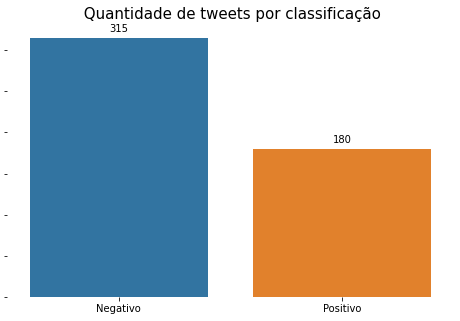

In [59]:
classes = ["Negativo", "Positivo"]
values = df.classificacao.value_counts().values.tolist()


fig, ax = plt.pyplot.subplots(figsize=(8,5))

g = sns.barplot(x=classes, y=values, ax=ax) 
  

ax.set_title(' Quantidade de tweets por classificação', fontsize=15)


g.set(yticklabels=[])

for position in ["right", "left", "bottom", "top"]:
    ax.spines[position].set_visible(False)
    
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    